# Выявление сетевых атак в корпоративных сетях методами машинного обучения

## Термины и определения

**Корпоративной сетью** называется коммуникационная система, принадлежащая и/или управляемая единой организацией в соответствии с правилами этой организации.

**Сетевыми атаками** называют вредоносные действия, которые выполняют сами злоумышленники (такие как сканирование портов, подбор паролей), а также действия, которые выполняют вредоносные программы, установленные на атакованном компьютере (такие как передача защищенной информации злоумышленнику) (определение дано из источника [5]).

**Сессией** будем называть набор сетевых пакетов между некоторой фиксированной парой (ip-адрес/порт, ip-адрес/порт).

**Инициатором сессии** будем называть сторону отправившая первый пакет в рамках сессии.

**Ответчик сессии**  будем называть сторону полечившую первый пакет в рамках сессии.

**Инициатор** и **ответчик** идентифицируется соответствующими им ip-адресами.

**Система обнаружения вторжения**  (СОВ, англ. IDS - Intrusion Detection System) - программное или аппаратное средство, предназначенное для выявления фактов неавторизованного доступа в компьютерную **систему** или сеть либо несанкционированного управления ими в основном через Интернет.

**Система предотвращения вторжения** (СПВ, англ. IPS - Intusion Prevention System) - программная или аппаратная **система** сетевой и компьютерной безопасности, обнаруживающая **вторжения** или нарушения безопасности и автоматически защищающая от них.



## Введение
### Порядок работы над проектом.
Процесс работы над проектом можно разбить на 4 этапа:

1. Изучение литературы по предметной области.
2. EDA.
3. Эксперименты с различными моделями.
4. Анализ полученных результатов.

### Краткое описание предметной области, практическая важность
Корпоративные сети стали важным элементом, обеспечивающим работу предприятий как крупного и среднего, так и малого бизнеса. При этом данные сети в большинстве случаев не являются изолированными и имеется возможность доступа в них из глобальных сетей (Интернет) через сетевые шлюзы как авторизованных, таки и неавторизованных пользователей. Это создаёт две главные потенциальные угрозы:

- получение доступа к корпоративной информации третьей (не легитимной стороной);
- сбои и нарушение нормальной работы корпоративной сетевой инфраструктуры. 

Защита данных и сетевой инфраструктуры от деструктивных воздействий является фундаментальной проблемой и её решение состоит из целого комплекса мер разного характера: технических (использование сетевых экранов, антивирусов, системы обнаружения вторжений  (СОВ, англ. IDS - Intrusion Detection System), система предотвращения вторжений IPS (СПВ, англ. IPS - Intusion Prevention System), регламентных, административных более подробно (см. [1]).

Важным элементом защиты информации являются системы обнаружения вторжений (IDS) и предотвращения атак (IPS). Задачей первой является выявить факт атаки, задачей второй является её предотвратить (более подробно см. [2]). Очень часто IDS/IPS являются единой системой.

IDS/IPS осуществляет логирование основных событий и параметров сети и дальнейший поиск в соответствующих логах аномалий и в зависимости от типа системы информирование администратора о выявленной сетевой атаке и/или её блокирование. Выявление атак в наиболее известной Open Source IDS Snort (см. [3], [4]) строится на постоянно обновляемом наборе правил (сигнатур) и на данной момент это считается наиболее эффективный подход для решения рассматриваемой проблемы, поскольку позволяет обеспечить 100% выявление сетевых атак. 

Предлагаемая в данной работе модель может использоваться в IDS системах в качестве дополнительного элемента, потенциально позволяющего выявлять сетевые атаки не описанные имеющимся набором сигнатур и тем самым стать заметным элементом инфраструктуры сетевой безопасности корпоративной сети.


## Постановка проблемы, цели и задачи решаемые в работе
### Исходные данные
Решаемая в рамках данной работы задача формулируется следующим образом. Имеется лог с набором статистической информации о сессиях локальной сети за некоторый период времени (результат работы некоторой IDS). Среди множества всех сессий необходимо:

1. выделить подмножество сессий, являющихся сетевыми атаками;
2. подмножество сетевых атак в свою очередь разбить на подмножества, соответствующие конкретному типу атаки. 

В качестве основной метрики, оптимизируемой в процессе работы является **f1-score**, поскольку она является более сбалансированной оценкой. 

Для тестирования алгоритмов используется набор данных подготовленный Центром кибербезопасности университета Нового Южного Уэльса (г. Канберра, Австралия), который можно найти по ссылке: ([6] https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/)  или ([7] https://www.kaggle.com/mrwellsdavid/unsw-nb15 ). Есть также альтернативный набор данных ([8] https://kdd.ics.uci.edu/databases/kddcup99/). Теоретически оба набора данных можно объединить.

Рассматриваемый набор данных был получен на модельном стенде и содержит наиболее полный набор известных на текущий момент типов сетевых атак:

- **Fuzzers** – генерация случайных данных, чтобы вызвать отказ программы или сети;
- **Analysis** – содержит различные атаки, связанные со сканированием портов, спамом и внедрением в HTML-файлы;
- **Backdoors** – обход механизмов защиты с целью скрытого доступа к данным или программам;
- **DoS** – отказ в обслуживании сервера или сетевого ресурса;
- **Exploits** – эксплуатация известных атакующему уязвимостей в операционной системе или программе;
- **Generic** – техника обнаружения трафика, шифрованного блочным шифром;
- **Reconnaissance** – разведывательные атаки;
- **Shellcode** – передача небольших частей кода, используемых для эксплуатации уязвимостей программ;
- **Worms** – атаки, связанные с самореплицируемыми вирусами.

Ниже на рисунке представлена схема стенда
!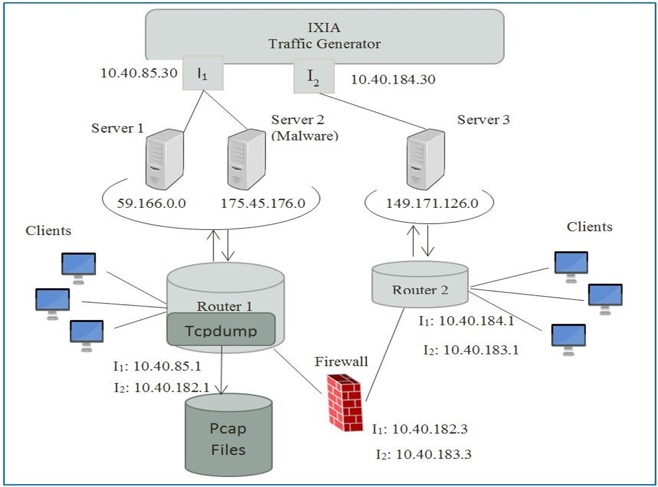
Используемый набор данных содержит статистические признаки, получаемые на основе ip-адресов и портов на стороне инициатора и ответчика, и не включает их фактические значения. Это позволяет распространить использование получаемые на его основе моделей на другие сети.

### Цель и задачи

**Целью** данной работы является выбор наиболее оптимального алгоритма машинного обучения для выявления сетевых атак в корпоративных сетях, построенных на основе стека протоколов TCP/IP.

**Задачи** решаемые в данной работе:

1. выбор оптимального набора характеристик (признаков) сетевого трафика для решения поставленной проблемы;
2. сравнительный анализ наиболее популярных алгоритмов машинного обучении применительно к рассматриваемой проблеме; 
3. выбор оптимального алгоритма для решения рассматриваемой проблемы.

## Экспериментальная часть
### Анализ исходных данных (EDA)

Подробные результаты EDA с исходным кодом можно найти: https://github.com/MBS1983/SF_DST8_Diplom/blob/main/EDA.ipynb . 
Ниже преведены основные результаты анализа исходных данных.

В процессе EDA проведена предварительная обработка исходного массива данных: значения признаков стандартизированы, категориальные переменные преобразованы в числовые, удалены признаки сильно коррелирующие между собой. Оставлены 20 наиболее не скоррелированных между собой и более всего коррелирующих с целевыми переменными признаков. 

По итогам EDA можно сделать следующие выводы.

1. Целевые классы сильно не сбалансированы.
2. Пропуски в данных отсутствуют.
3. Судя по визуализации класс атак и не атак разделимы.
4. Итоговый набор, используемый при тестировании алгоритмов, содержит 20 признаков.

Результаты анализ значимости признаков для конкретных алгоритмов (см. ниже) показывают, что наиболее важными признаками для классификации типов атак являются:

**sttl** - параметр TTL инициатора

**smean** - средний размер переданных пакетов от инициатора к ответчику

**dmean** - средний размер переданных пакетов от инициатора к ответчику

**ct_state_ttl** - количество сессий с таким же state и значениями sttl/dttl

**sbytes** - передано байт от инициатора к ответчику

**dbytes** - передано байт от ответчика к инициатору.

Необходимо отметить что: признаки: **sttl** , **ct_state_ttl**, **smean**  характеризуют тип операционной системы инициатора соединения (см. работу [9]).



### Сравнительный анализ различных алгоритмов

В работе проводится сравнение основных алгоритмов, используемых в настоящее время для решения подобного класса задач. Алгоритмы оценивались для двух случаев: когда требуется отнести сессию к классу атака/нормальный трафик и для случая когда нужно определить конкретный класс атаки. В сети Интернет есть некоторое количество работ, в которых приводится сравнительный анализ различных алгоритмов машинного обучения для рассматриваемого набора данных (см. [10] - [13]).

Экспериментальная часть проекта c исходным кодом находится в ноутбуке:  https://github.com/MBS1983/SF_DST8_Diplom/blob/main/sf-diplom-result-skvortsov.ipynb.

Ниже приведены сводные таблица 1 и таблица 2 с оценочными (по тестовой выборке) значениями метрик с результатами различных алгоритмов для бинарного и многоклассового случая соответственно.

| Model Name                             | Time to train (sec) | Balanced Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1  |
| :------------------------------------- | :------------------ | :---------------- | :------------ | :------------- | :---------- | :------- |
| RandomForest                           | 28.952621           | 0.935569          | 0.940274      | 0.940312       | 0.940274    | 0.940292 |
| Стэккинг                               | 1110.543225         | 0.933650          | 0.940274      | 0.940135       | 0.940274    | 0.940175 |
| Xgboost                                | 7.485140            | 0.935541          | 0.939594      | 0.939738       | 0.939594    | 0.939655 |
| Бэггинг ExtrTrees для бинарного случая | 140.432910          | 0.934634          | 0.939303      | 0.939358       | 0.939303    | 0.939329 |
| Catboost                               | 173.661579          | 0.934892          | 0.938915      | 0.939074       | 0.938915    | 0.938981 |
| AdaBoost для бинарного случая          | 11.654126           | 0.868551          | 0.898671      | 0.903729       | 0.898671    | 0.895774 |
| Полносвязная нейронная с               | 26.441790           | 0.864034          | 0.898535      | 0.907296       | 0.898535    | 0.894860 |
| Логистическая регрессия                | 3.326974            | 0.842991          | 0.880567      | 0.889007       | 0.880567    | 0.875893 |

Таблица 1. Бинарная классификация



| Model Name                              | Time to train (sec) | Balanced Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1  |
| :-------------------------------------- | :------------------ | :---------------- | :------------ | :------------- | :---------- | -------- |
| Стэкинг                                 | 7630.545595         | 0.532454          | 0.823479      | 0.821322       | 0.823479    | 0.808716 |
| Xgboost                                 | 26.318372           | 0.546132          | 0.824217      | 0.824205       | 0.824217    | 0.804092 |
| Бэггинг ExtraTrees                      | 171.217639          | 0.511222          | 0.818958      | 0.814228       | 0.818958    | 0.802950 |
| RandomForest для многоклассового случая | 32.845092           | 0.521912          | 0.822373      | 0.818629       | 0.822373    | 0.802882 |
| Catboost                                | 1461.847110         | 0.520310          | 0.819889      | 0.816606       | 0.819889    | 0.795871 |
| Логистическая регрессия                 | 35.583306           | 0.322002          | 0.718948      | 0.683846       | 0.718948    | 0.674701 |
| AdaBoost                                | 11.966376           | 0.330679          | 0.680993      | 0.662702       | 0.680993    | 0.666324 |
| Полносвязная нейронная сеть             | 29.173934           | 0.281946          | 0.710837      | 0.630260       | 0.710837    | 0.635859 |

Таблица 2 Многоклассовая классификация

#### Сравнение результатво с другими работами

Ниже в таблице 3 приведено сравнение результатов настоящей работы с работами [10]- [12]. В [] приведены ссылки на соответствующие работы.

| Algorithm       | Test Accuracy | Test F1  | Balanced Accuracy %[10] | F1 [11]  | Accuracy % [12] |
| :-------------- | ------------- | -------- | ----------------------- | -------- | --------------- |
| RandomForest    | 0.940312      | 0.940292 | 0.9868                  | 0.893433 | 92.62           |
| Neural Network  | 0.898535      | 0.894860 | -                       | 0.880223 | 91.07           |
| Log. Reg.       | 0.880567      | 0.875893 | 0.9867                  | 0.821391 | 89.05           |
| AdaBoost        | 0.898671      | 0.895774 | 0.9866                  | -        | -               |
| Ансамблирование | 0.940274      | 0.940175 | 0.9868                  | -        | -               |

Таблица 3.

В целом полученные результаты согласуются с работами с работами [11], [12]. В работе [10] приводятся лучшие значения метрики Balnced Accuracy. Но воспроизвести по материалам статьи данные результаты не удалось.

Многоклассовая классификация согласуется с результатами работы [12], но при этом есть расхождения с работой [10] (см. таблицу 4). 

| Алгоритм           | Test F1  | Test F1 [12] | **Balanced Accuracy** | **Balanced Accuracy** [10] |
| ------------------ | -------- | ------------ | --------------------- | -------------------------- |
| RandomForest       | 0.802882 | 0.756255     | 0.521912              | 0.5602                     |
| Нейронная сеть     | 0.635859 | 0.707125     | 0.281946              | -                          |
| LogisticRegression | 0.674701 | 0.633338     | 0.322002              | 0.5057                     |
| AdaBoost           | 0.666324 | -            | 0.330679              | 0.6918                     |
| Ансамблирование    | 0.808716 | -            | 0.532454              | 0.6394                     |

Таблица 4.

В результате проделанной работы лучший результат для случая бинарной классификация показал алгоритм RandomForest. Ниже на рисунке приведена его матрица ошибок.

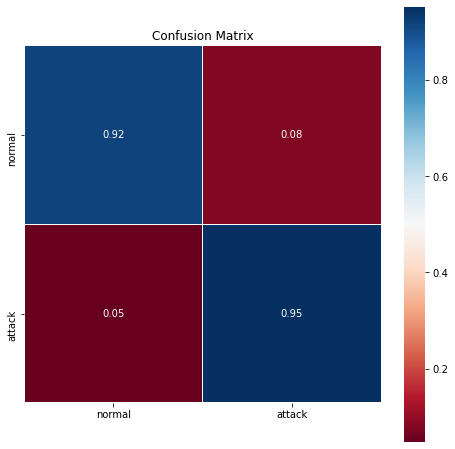

Стоит отметить, что нейронная сеть определила правильно 99% атак. См. матрицу ошибок ниже.

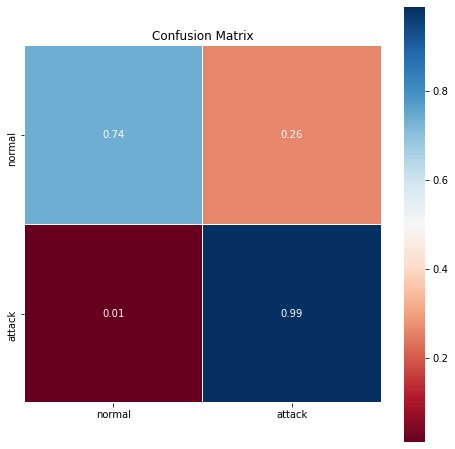
В случае мультиклассовой классификации лучшим алгоритмом стал стэккинг моделей:

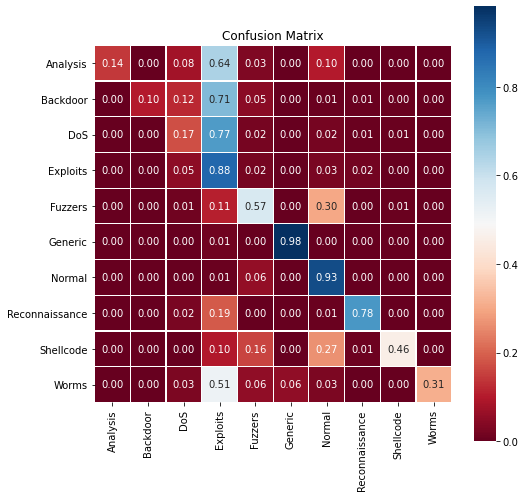

Алгоритм довольно часто считает, что атака относится к классу Exploits вместо реального класса DoS (77%), Analysis (64%), Backdoor (71%), Worms (51%), Reconnaissance (19%), Shellcode (10%).
Предположительно из-за того что что атаки эксплуатации уязвимостей и фазинга по признакам и последствиям похожи на атаки других классов.

## Основные результаты и выводы

В результате проведённого анализа на основе набора данных [6]:

1. проведён отбор оптимального набора признаков;
2.  осуществлён сравнительный анализ различных алгоритмов машинного обучения для решения задачи бинарной классификации (по типу атака/не атака) и многоклассовой классификации (по типам атак);
3. для решения задачи бинарной классификации лучший результат показал алгоритм RandomForest, для многоклассовой - стэкинг моделей. 

В целом для анализа трафика в корпоративных сетях и выявления атак можно использовать алгоритм RandomForest, а для уточнения классов атак – стэккинг моделей. Основное преимущество алгоритмов машинного обучения для решения задачи выявления сетевого трафика состоит в том, что они могут быть использованы для выявления новых типов или разновидностей атак в пределах описанных классов.

## Ссылки и литература

1. Проскурин В.Г., Крутов С.В., Мацкевич И.В. Программно-аппаратные средства обеспечения информационной безопасности. Защита в ОС. - М.: Радио и связь, 2000. - 166 с.
2. https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BE%D0%B1%D0%BD%D0%B0%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B2%D1%82%D0%BE%D1%80%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9
3. Kohlenberg, Toby (Ed.), Alder, Raven, Carter, Dr. Everett F. (Skip), Jr., Foster, James C., Jonkman Marty, Raffael, and Poor, Mike, "Snort IDS and IPS Toolkit, " Syngress, 2007, [ISBN 978-1-59749-099-3](https://ru.wikipedia.org/wiki/Служебная:Источники_книг/9781597490993)
4. https://www.snort.org/
5. https://support.kaspersky.com/KIS4Mac/16.0/ru.lproj/pgs/88075.htm
6. https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/  
7. https://www.kaggle.com/mrwellsdavid/unsw-nb15
8. https://kdd.ics.uci.edu/databases/kddcup99/
9. https://www.researchgate.net/publication/221596394_Semi-supervised_network_traffic_classification
10. ВЫЯВЛЕНИЕ АТАК В КОРПОРАТИВНЫХ СЕТЯХ С ПОМОЩЬЮ МЕТОДОВ МАШИННОГО ОБУЧЕНИЯ
    Н.Ф. Бахарева, В.Н. Тарасов, А.Е. Шухман, П.Н. Полежаев, Ю.А. Ушаков, А.А. Матвеев (2018) http://sitito.cs.msu.ru/index.php/SITITO/article/download/427/389/
11. https://github.com/harshilpatel1799/Iot-Cyber-Security-with-Machine-Learning-Research-Project 
12. https://www.kaggle.com/omaralhory/ids-data-eda
